In [24]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
df["ca"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [41]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
from sklearn.feature_selection import VarianceThreshold

In [6]:
variance_thres=VarianceThreshold(threshold=0)
variance_thres.fit(df)

VarianceThreshold(threshold=0)

In [7]:
variance_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [8]:
constant_columns=[column for column in df.columns if column not in df.columns[variance_thres.get_support()]]

In [9]:
constant_columns

[]

In [10]:
df.drop(constant_columns, axis=1, inplace=True)

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

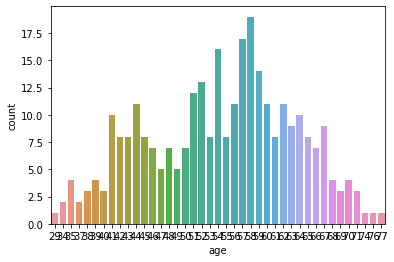

In [12]:
import seaborn as sns
sns.countplot(df["age"])


In [13]:
df["target"].value_counts()

X=df.drop(["target"], axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X, df["target"], test_size=.25, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr=LogisticRegression()

In [18]:
lr.fit(X_train,y_train)

C:\Users\sagarw39\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred=lr.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
cf=confusion_matrix(y_test,y_pred)

In [22]:
print(accuracy_score(y_test,y_pred))

0.881578947368421


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [43]:
rf=RandomForestClassifier()

In [44]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred_rf=rf.predict(X_test)

In [46]:
cf1=confusion_matrix(y_test,y_pred_rf)

In [47]:
print(cf1)

[[27  8]
 [ 4 37]]


In [56]:
error_rate=[]

# We will run from k1 to k40. will take time to run

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error rate')

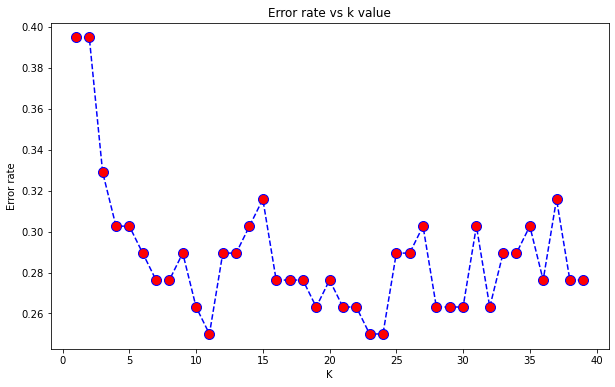

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color="blue",linestyle="dashed",marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate vs k value")
plt.xlabel("K")
plt.ylabel("Error rate")

In [59]:
    knn=KNeighborsClassifier(n_neighbors=11)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)

In [60]:
cf2=confusion_matrix(y_test,pred_i)

In [61]:
print(cf2)

[[23 12]
 [ 7 34]]


In [25]:
# save the model to disk
filename = 'heart_model.pkl'
pickle.dump(lr, open(filename, 'wb'))